In [19]:
import os
import pickle5 as pickle
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor as LOF
pd.set_option('display.max_rows', 500)
FOLDER = r"./Bha_matrices/North/"

In [3]:
def read_pickle(file,folder=FOLDER):
    data = pickle.load(open(folder+file,'rb'))
    return data
def perform_lof(intersection,neighbor_rate):
    results={}
    name = [x for x in intersection.keys()][0] #set the name of the dict
    for i in range(len(intersection[name])): #for each weekday; 0 = monday 00:00, 168 = sunday 23:00
        datas = intersection[name][i][0] #data is here
        dates = intersection[name][i][1] #timeslots
        #outliers= lof(datas,neighbors)
        lof_scores = lof(datas,neighbor_rate)
        #print("Amount of outliers on slot "+str(i)+" is "+str(len(outliers))+ " out of total hours of "+str(len(datas)))
        #outlier_dates = [dates[x] for x in outliers]
        #results[i]=outlier_dates #set results with key timeslot int to the results of current loop
        if len(lof_scores) == len(dates):
            results[i]=pd.DataFrame({'index':dates, name:lof_scores}) #return dates and LOF scores
            results[i]=results[i].set_index(pd.DatetimeIndex(results[i]['index']))
            results[i]=results[i].drop(columns=['index'])
            results[i]=results[i].sort_values(by=name, ascending=False)
        else:
            print('lists not of same length')
    return name,results
def lof(data,nbor_rate):
    model = LOF(n_neighbors=int(len(data)*nbor_rate), metric='precomputed', contamination='auto', n_jobs=-1)
    preds = model.fit_predict(data) #perform LOF on all data
    #outliers = np.where(preds==-1)[0] #the indices of the outliers, use to compare with dates
    lof_scores = model.negative_outlier_factor_
    lof_scores = [x*-1 for x in lof_scores]
    return lof_scores #outliers
def run_all_analyses(neighbor_rate,folder=FOLDER):
    all_results={}
    for file in os.listdir(folder): #read all files:
        if file.endswith(".pkl"): #for all pickle files in the folder
            name = file[:-4]
            #print("Starting intersection: "+name) 
            current_intersection = read_pickle(file) #load it
            name,results = perform_lof(current_intersection,neighbor_rate)
            all_results[name]=results
    return all_results


In [12]:
def test_neigbors(x):
    num=[]
    for i in range(1,len(x)):
        clf = LocalOutlierFactor(n_neighbors=i,metric='precomputed',contamination='auto')
        test = clf.fit_predict(x)
        outliers = np.where(test==-1)
        num.append(len(outliers[0])) #create array with num of outliers for num of neighbors
    plt.plot(num)
    plt.title('Number of outliers discovered based on number of neighbors')
    plt.axvline(len(num)*0.6, color='black')
    plt.show()
    return
data = read_pickle("PFD_K561.pkl",FOLDER)


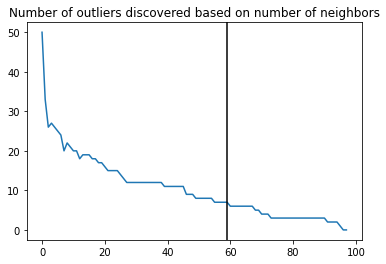

In [17]:
test_neigbors(data['PFD_K561'][10][0])

In [4]:
all_resultsS=run_all_analyses(0.6)

In [16]:
south = create_lof_df(all_resultsS,direction="South")

<AxesSubplot:>

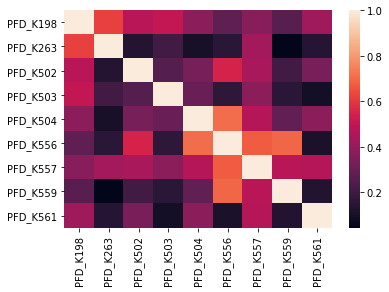

In [18]:
sns.heatmap(south.corr())

In [20]:
all_resultsN = run_all_analyses(0.6)
#all_resultsN1 = run_all_analyses(0.1)
north = create_lof_df(all_resultsN,direction="North")
#north1 =create_lof_df(all_resultsN1,direction="North")

In [50]:
north.describe()

,PFD_K198,PFD_K263,PFD_K502,PFD_K503,PFD_K504,PFD_K556,PFD_K557,PFD_K559,PFD_K561
count,10608.000000,11688.000000,7824.000000,15504.000000,15840.000000,12192.000000,9312.000000,14808.000000,16728.000000
mean,1.231138,1.767264,1.227277,1.456275,1.198701,1.202999,1.228627,1.204777,1.266603
std,1.907654,45.460970,3.014070,6.260453,1.845531,1.946388,2.420252,1.962270,3.637229
min,0.859323,0.867061,0.795674,0.868867,0.875187,0.870151,0.865415,0.856951,0.866769
25%,0.964581,0.965583,0.964294,0.964170,0.965156,0.963727,0.964267,0.964876,0.965199
50%,1.006929,1.007629,1.008193,1.008602,1.005538,1.007826,1.006290,1.006097,1.006553
75%,1.131650,1.117489,1.120892,1.148176,1.118316,1.121354,1.124512,1.123857,1.116064
max,81.188512,4890.670047,224.877301,517.166106,105.646287,112.530095,184.602733,166.866408,247.185873


In [51]:
north1.describe()

,PFD_K198,PFD_K263,PFD_K502,PFD_K503,PFD_K504,PFD_K556,PFD_K557,PFD_K559,PFD_K561
count,10608.000000,11688.000000,7824.000000,15504.000000,15840.000000,12192.000000,9312.000000,14808.000000,16728.000000
mean,1.873234,3.354480,2.136305,2.486254,1.725146,1.745847,1.825451,1.707053,1.853294
std,5.207031,116.361339,12.144343,19.495567,4.081687,4.489791,6.297635,5.058221,9.021370
min,0.655949,0.611608,0.332854,0.707665,0.729646,0.696215,0.661852,0.714666,0.727276
25%,1.039733,1.039652,1.038692,1.050657,1.038042,1.039738,1.034209,1.040542,1.034284
50%,1.248809,1.239232,1.270319,1.276228,1.242571,1.237265,1.229150,1.229720,1.209614
75%,1.709851,1.701400,1.825418,1.824058,1.675292,1.681228,1.680573,1.652461,1.605407
max,251.102850,12354.694380,984.438794,1671.343311,234.220742,346.469911,447.630492,468.487748,616.374358


In [64]:
print(north.sort_values(by='PFD_K198', ascending=False)[['PFD_K198']][:8].to_latex())

\begin{tabular}{lr}
\toprule
{} &   PFD\_K198 \\
timestamp           &            \\
\midrule
2019-12-26 05:00:00 &  81.188512 \\
2019-03-09 13:00:00 &  76.469487 \\
2019-01-01 06:00:00 &  70.828913 \\
2020-01-01 08:00:00 &  66.177669 \\
2020-01-01 06:00:00 &  51.487051 \\
2019-01-01 09:00:00 &  38.337015 \\
2019-12-25 08:00:00 &  38.123327 \\
2020-01-01 09:00:00 &  33.525317 \\
\bottomrule
\end{tabular}



In [63]:
print(north1.sort_values(by='PFD_K198', ascending=False)[['PFD_K198']][:8]

\begin{tabular}{lr}
\toprule
{} &    PFD\_K198 \\
timestamp           &             \\
\midrule
2020-01-01 08:00:00 &  251.102850 \\
2019-03-09 13:00:00 &  205.914505 \\
2019-01-01 06:00:00 &  181.565936 \\
2019-12-25 08:00:00 &  172.127632 \\
2019-12-26 05:00:00 &  157.198101 \\
2019-12-07 13:00:00 &   98.848792 \\
2019-01-01 09:00:00 &   91.142769 \\
2020-01-01 05:00:00 &   90.927172 \\
\bottomrule
\end{tabular}



In [21]:
all_resultsS = run_all_analyses()

Starting intersection: PFD_K198
Starting intersection: PFD_K263
Starting intersection: PFD_K502
Starting intersection: PFD_K503
Starting intersection: PFD_K504
Starting intersection: PFD_K556
Starting intersection: PFD_K557
Starting intersection: PFD_K559
Starting intersection: PFD_K561


In [22]:
north.corr().sort_values(by='PFD_K504', ascending=False)['PFD_K504']

PFD_K504    1.000000
PFD_K556    0.705601
PFD_K557    0.467116
PFD_K198    0.380323
PFD_K561    0.380293
PFD_K502    0.332896
PFD_K503    0.303515
PFD_K559    0.285499
PFD_K263    0.105476
Name: PFD_K504, dtype: float64

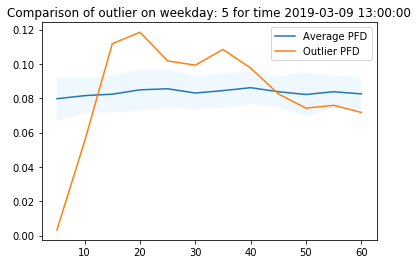

In [6]:
def compare_outlier(outlier,pfd_intersection,direction):
    """Function to plot the average PFD for an hour of a weekday against an outlier PFD"""
    
    df = pd.read_pickle("./PFD/"+direction+"/"+pfd_intersection+".pickle") #load pfd pickle of that intersection
    outlier_data = df.loc[(df['timestamp'].dt.date ==outlier.date()) & (df['timestamp'].dt.hour ==outlier.hour)] #set apart the values for the hour of the outlier
    #now manipulate df to only contain PFDs for that weekday and hour; e.g. all flows for 18:00 at Thursdays.
    df = df.loc[(df['timestamp'].dt.dayofweek ==outlier.dayofweek) & (df['timestamp'].dt.hour ==outlier.hour)] 
    df= df['prob'].groupby(by=df['timestamp'].dt.time).agg([np.mean, np.std])
    xticks = [x for x in range(5,61,5)] #better index; values indicate the minutes (5,10, etc..)
    plt.plot(xticks,df['mean'],label='Average PFD') #plot the average PFDs
    
    plt.fill_between(xticks, df['mean']-df['std'],df['mean']+df['std'], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
    plt.plot(xticks,outlier_data['prob'],label='Outlier PFD') #Plot the outlier PFD
    plt.legend()
    plt.title("Comparison of outlier on weekday: "+str(outlier.weekday())+" for time "+str(outlier))
    plt.savefig('./figures/flow_compare_'+pfd_intersection+"_"+str(outlier.date())+"_"+str(outlier.hour)+".png")
    plt.show()
    return #return nothing
compare_outlier(pd.Timestamp('2019-03-09 13:00:00'),'PFD_K198','North')

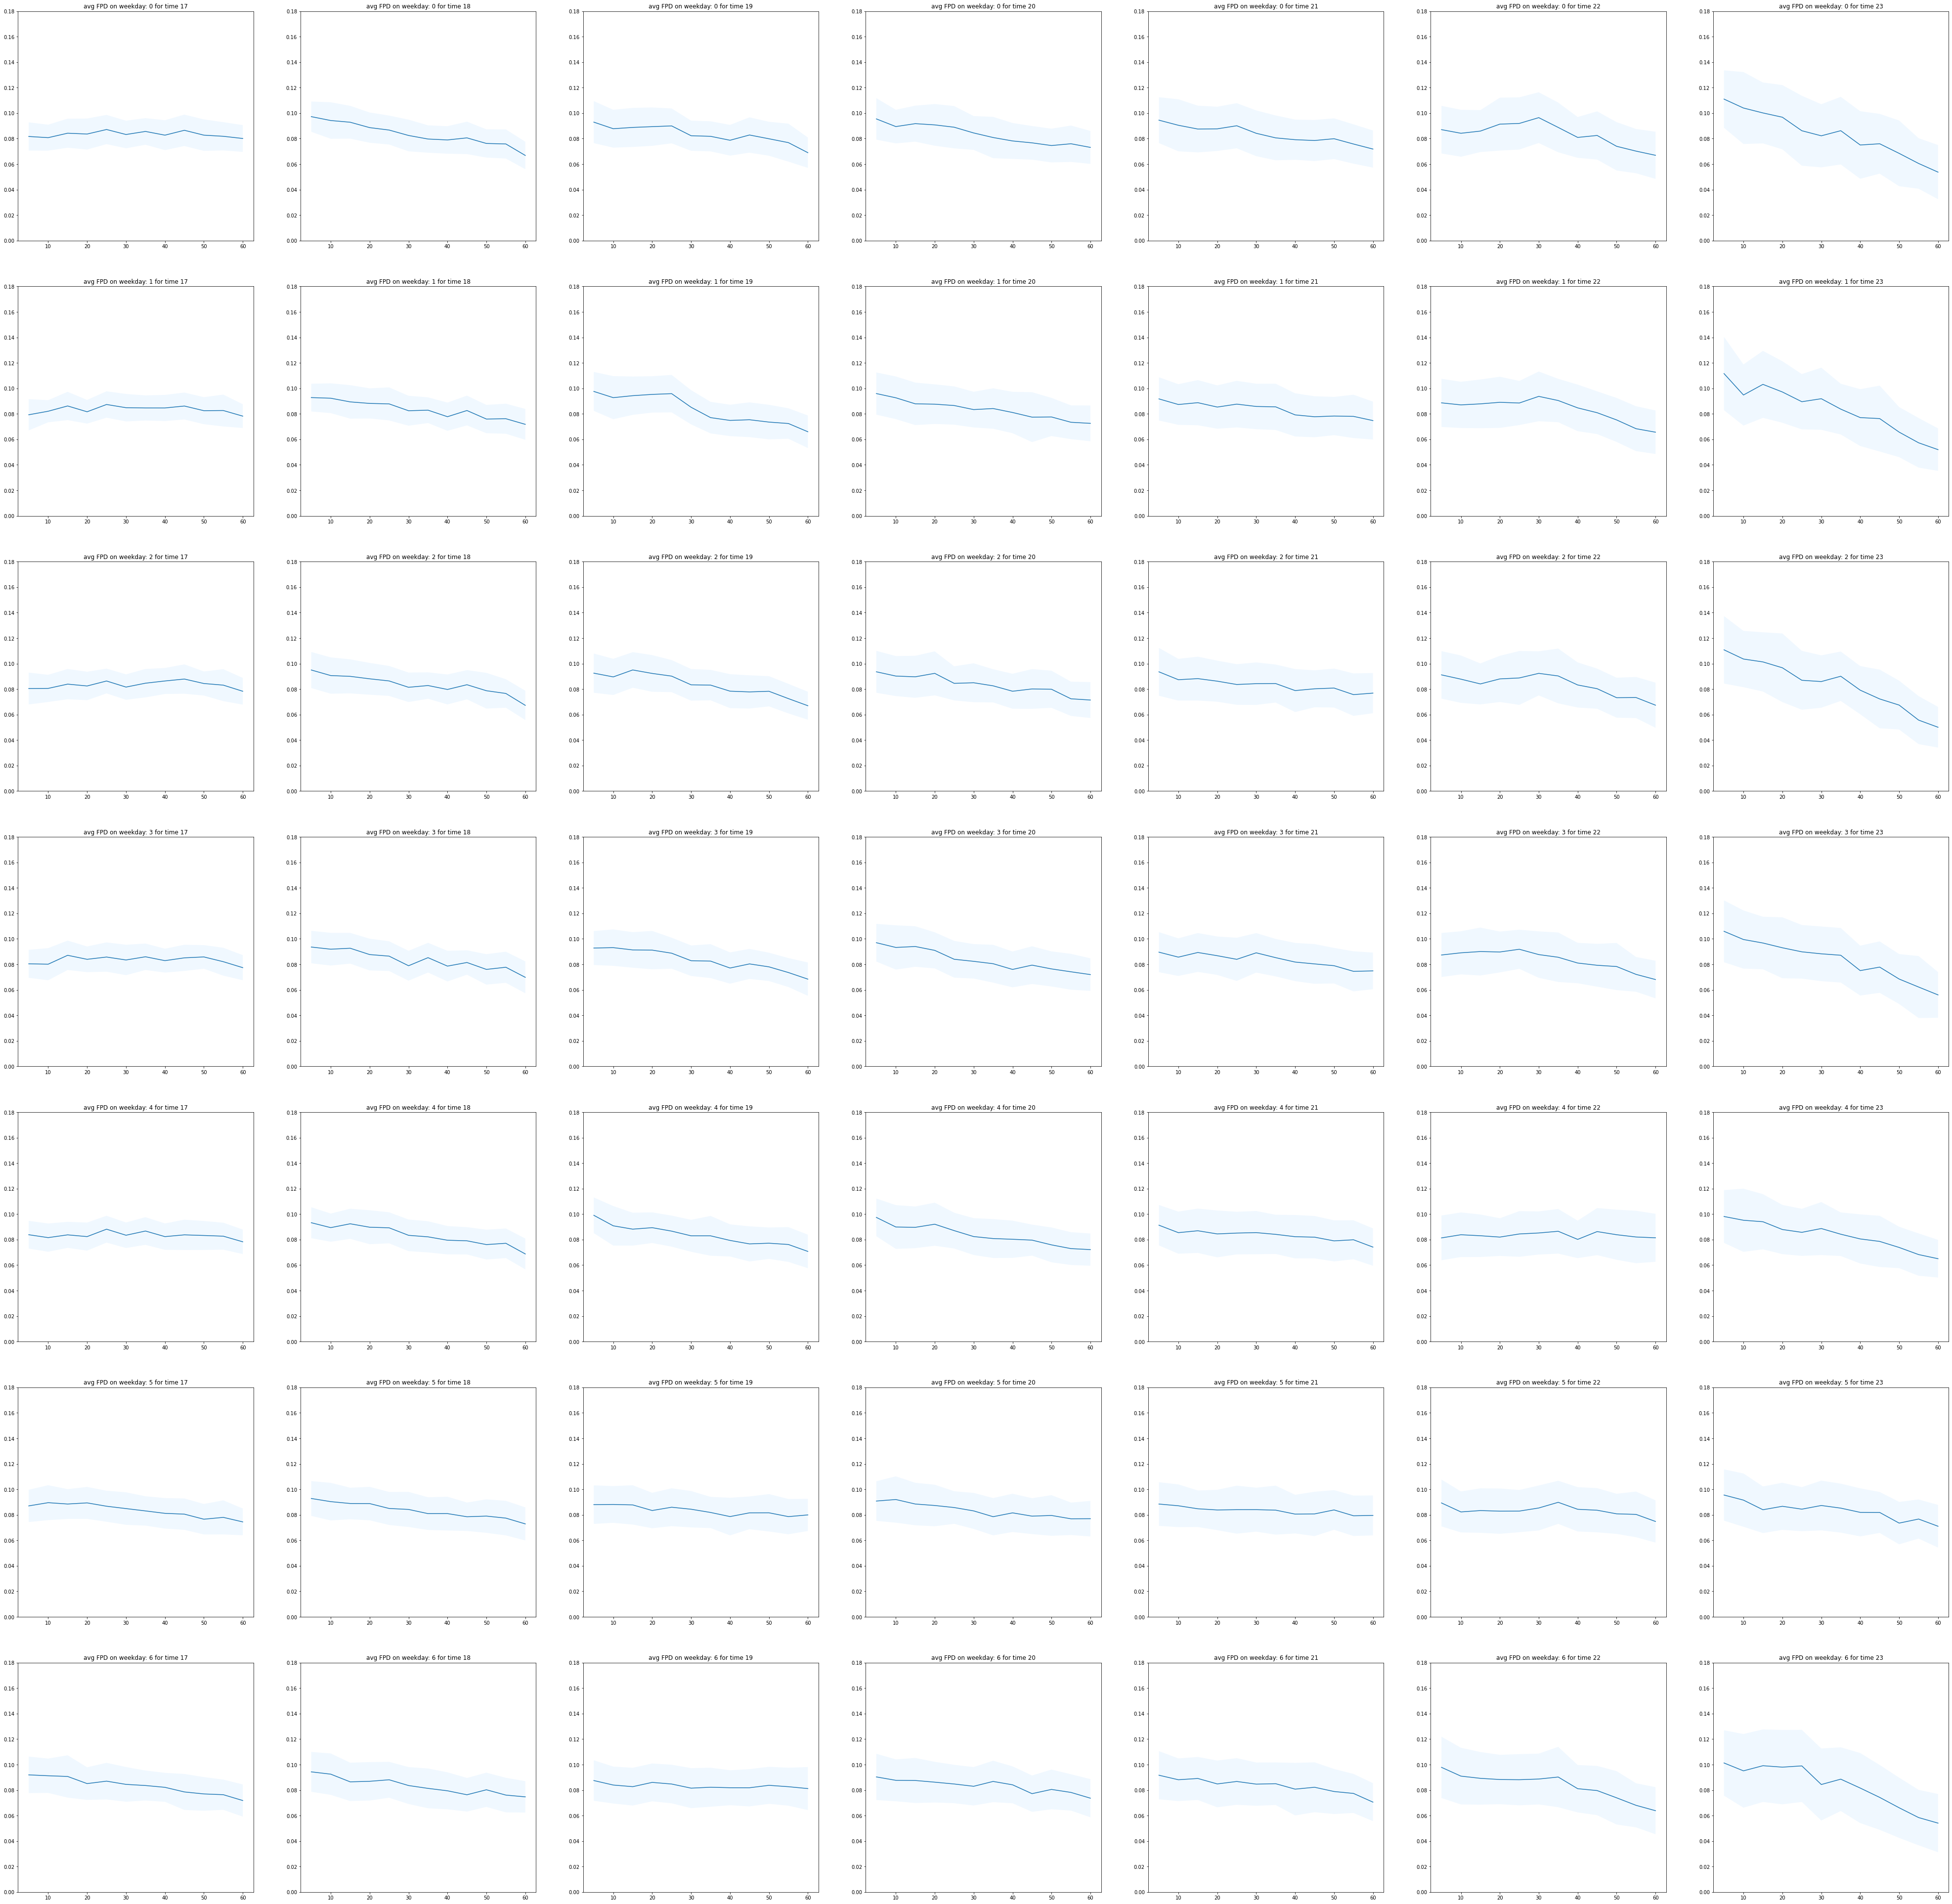

In [12]:
#compare hours
def compare_flows(pfd_intersection,direction,start,rows=7,cols=7):
    """Function to plot the average PFD for an hour of a weekday against an outlier PFD"""
    with open("./PFD/"+direction+"/"+pfd_intersection+".pickle", 'rb') as f:
        df = pickle.load(f)
    fig, ax=plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey='row', figsize=(rows*10,cols*10))
    i=1
    for weekday in range(rows):
        for hour in range(start,start+7):
            #now manipulate df to only contain PFDs for that weekday and hour; e.g. all flows for 18:00 at Thursdays.
            data = df.loc[(df['timestamp'].dt.dayofweek ==weekday) & (df['timestamp'].dt.hour ==hour)] 
            data= data['prob'].groupby(by=df['timestamp'].dt.time).agg([np.mean, np.std])#.values #only keep average values
            xticks = [x for x in range(5,61,5)] #better index; values indicate the minutes (5,10, etc..)

            plt.subplot(rows,cols,i)           
            plt.plot(xticks,data['mean'],label='Average PFD') #plot the average PFDs
            #plot mean+- std:
            plt.fill_between(xticks, data['mean']-data['std'],data['mean']+data['std'], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
            plt.yticks(np.arange(0, 0.2, step=0.02))
            plt.title("avg FPD on weekday: "+str(weekday)+" for time "+str(hour))
            i+=1
    fig.savefig('compare_flows'+str(start)+'.png')
    return data

test = compare_flows('PFD_K504',"North",start=17)

## Create a large dataframe that contains all outliers with hourly timestamps as index
To be able to find corellations between the outliers, we will create a large DF containing all hourly timestamps in the dataset (january 2018 - march 2020) and a boolean indication for that location that says whether it was an outlier.

In [15]:
import seaborn as sns
def create_outlier_df(results,direction="North",threshold=1.5):
    """create df with binary outliers.
    We can take several approaches to this; right now I will take all scores above the threshold of 1.5."""
    
    df = pd.DataFrame()
    for intersection in results.keys():
        with open("./PFD/"+direction+"/"+intersection+".pickle", 'rb') as f:
            dates = pickle.load(f)
        #dates = pd.read_pickle("./PFD/"+direction+"/"+intersection+".pickle") #read all data from insct
        dates = dates.groupby(pd.Grouper(key='timestamp', freq="H")).sum() #extract hourly timeslots which have data
        dates[intersection]= np.nan
        dates = dates.drop(columns=['cars','total','prob'])
        
        for x in results[intersection]: #for each timeslot, so 168 times, we take the results. This holds the LOF scores.
            timeslot = results[intersection][x].copy() #all results for this timeslot
            timeslot[intersection]= timeslot[intersection].apply(lambda x: 1 if x>threshold else 0) #set all scores above threshold to 1 and the rest to 0
            dates.update(timeslot)
        df = pd.merge(df,dates, left_index=True, right_index=True, how='outer')
    return df
#all_outlier_df= create_outlier_df(all_resultsN)

def create_lof_df(results,direction):
    """create df with all LOF scores"""
    df = pd.DataFrame()
    for intersection in results.keys():
        with open("./PFD/"+direction+"/"+intersection+".pickle", 'rb') as f:
            dates = pickle.load(f)
        #dates = pd.read_pickle("./PFD/"+direction+"/"+intersection+".pickle") #read all data from insct
        dates = dates.groupby(pd.Grouper(key='timestamp', freq="H")).sum() #extract hourly timeslots which have data
        dates[intersection]= np.nan
        dates = dates.drop(columns=['cars','total','prob'])
        for x in results[intersection]:
            timeslot = results[intersection][x] .copy()
            dates.update(timeslot)
        df = pd.merge(df,dates, left_index=True, right_index=True, how='outer')
    return df
#north = create_lof_df(all_resultsN,direction="North")
#south = create_lof_df(all_resultsS,direction="South")
#print(north.isna().sum())
#print(south.isna().sum())
#theres a lot of datapoints that remain NaN; check if this persists after updating the PFDs.

def create_top_outlier_df(results,direction):
    """create df with only the biggest outliers.
    We can take several approaches to this; right now I will take the 5 largest outliers for each slot."""
    
    df = pd.DataFrame()
    for intersection in results.keys():
        dates = pd.read_pickle("./PFD/"+direction+"/"+intersection+".pickle") #read all data from insct
        dates = dates.groupby(pd.Grouper(key='timestamp', freq="H")).sum() #extract hourly timeslots which have data
        dates[intersection]= np.nan
        dates = dates.drop(columns=['cars','total','prob'])
        
        for x in results[intersection]: #for each timeslot, so 168 times, we take the results. This holds the LOF scores.
            timeslot = results[intersection][x].copy() #all results for this timeslot
            threshold = timeslot[intersection][5]

            timeslot[intersection]= timeslot[intersection].apply(lambda x: 1 if x>threshold else 0) #set all scores above threshold to 1 and the rest to 0
            dates.update(timeslot)
        df = pd.merge(df,dates, left_index=True, right_index=True, how='outer')
    return df
#top_outliers = create_top_outlier_df(all_resultsN,direction="North")

Text(0.5, 1, 'Heatmap of Binary Outlier Correlations The Hague')

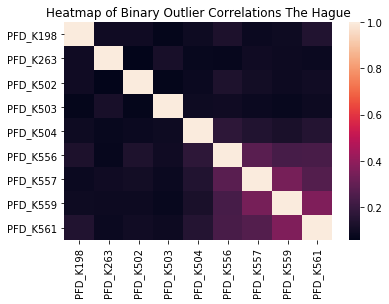

In [17]:
sns.heatmap(all_outlier_df.corr())
plt.title('Heatmap of Binary Outlier Correlations The Hague')

In [15]:
top_outliers.describe()

,PFD_K198,PFD_K263,PFD_K502,PFD_K503,PFD_K504,PFD_K556,PFD_K557,PFD_K559,PFD_K561
count,10608.000000,11688.000000,7824.000000,15504.000000,15840.000000,12192.000000,9312.000000,14808.000000,16728.000000
mean,0.079186,0.071869,0.107362,0.054180,0.053030,0.068898,0.090206,0.056726,0.050215
std,0.270041,0.258281,0.309593,0.226379,0.224101,0.253290,0.286492,0.231326,0.218395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1, 'Heatmap of Binary Top Outliers Correlations The Hague')

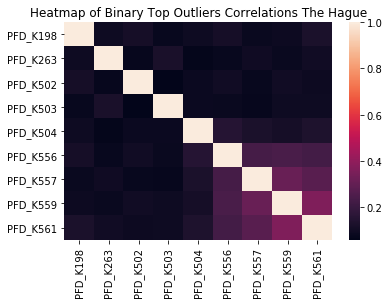

In [18]:
sns.heatmap(top_outliers.corr())
plt.title('Heatmap of Binary Top Outliers Correlations The Hague')

Text(0.5, 1, 'Heatmap of Raw LOF Score Correlations The Hague')

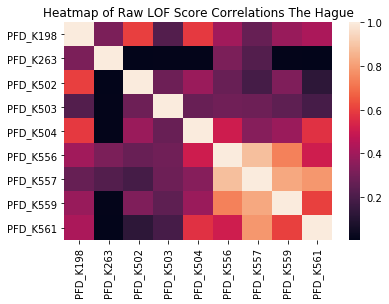

In [19]:
sns.heatmap(north.corr())
plt.title('Heatmap of Raw LOF Score Correlations The Hague')

In [26]:
print(north.corr().round(3).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  PFD\_K198 &  PFD\_K263 &  PFD\_K502 &  PFD\_K503 &  PFD\_K504 &  PFD\_K556 &  PFD\_K557 &  PFD\_K559 &  PFD\_K561 \\
\midrule
PFD\_K198 &     1.000 &     0.317 &     0.603 &     0.223 &     0.588 &     0.401 &     0.267 &     0.384 &     0.425 \\
PFD\_K263 &     0.317 &     1.000 &     0.005 &     0.011 &     0.012 &     0.316 &     0.220 &     0.009 &     0.006 \\
PFD\_K502 &     0.603 &     0.005 &     1.000 &     0.283 &     0.388 &     0.270 &     0.185 &     0.324 &     0.125 \\
PFD\_K503 &     0.223 &     0.011 &     0.283 &     1.000 &     0.270 &     0.292 &     0.284 &     0.250 &     0.188 \\
PFD\_K504 &     0.588 &     0.012 &     0.388 &     0.270 &     1.000 &     0.507 &     0.342 &     0.389 &     0.571 \\
PFD\_K556 &     0.401 &     0.316 &     0.270 &     0.292 &     0.507 &     1.000 &     0.885 &     0.739 &     0.512 \\
PFD\_K557 &     0.267 &     0.220 &     0.185 &     0.284 &     0.342 &     0.885 &     1.000 &     0.829

In [43]:
def print_preceding_intersections(north):
    thresholds=np.arange(0.1,0.7,0.1)
    names = north.corr().index.to_list()
    res=[]
    for threshold in thresholds:
        
        preceding=[]
        i=0
        for isct in north.corr().loc['PFD_K502']:

            if isct>threshold:
                if names[i]!='PFD_K502':
                    preceding.append(names[i][4:])
            i+=1
        res.append(len(preceding))
    print(res)

In [16]:
north.corr().index

Index(['PFD_K198', 'PFD_K263', 'PFD_K502', 'PFD_K503', 'PFD_K504', 'PFD_K556',
       'PFD_K557', 'PFD_K559', 'PFD_K561'],
      dtype='object')

k502 last one in network, use as target for LSTM.

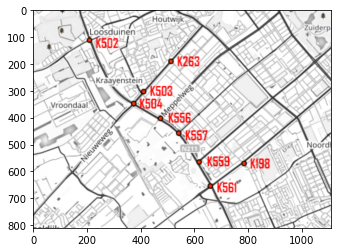

In [22]:
import matplotlib.image as mpimg
img=mpimg.imread(r'D:\uni_drive\Msc Datascience\Year 2\Thesis\Siemens\prullen\Figures\Traject_1.png')
imgplot = plt.imshow(img)
plt.show()

Large correlation between K559 & K561 - makes sense, they're close. Moderate cor between K557 & K559. 

In [45]:
#test differences in choosing num neigbors fraction:
neighbor_rates=np.arange(0.1,0.91,0.1)
for neighbor_rate in neighbor_rates:
    print("analysis for {}".format(neighbor_rate))
    all_resultsN = run_all_analyses(neighbor_rate)
    north = create_lof_df(all_resultsN,direction="North")
    print_preceding_intersections(north)

analysis for 0.1
[6, 3, 3, 1, 1, 1]
analysis for 0.2
[7, 6, 4, 2, 1, 1]
analysis for 0.30000000000000004
[7, 6, 5, 1, 1, 1]
analysis for 0.4
[7, 6, 5, 1, 1, 1]
analysis for 0.5
[7, 5, 3, 1, 1, 1]
analysis for 0.6
[7, 5, 3, 1, 1, 1]
analysis for 0.7000000000000001
[7, 5, 3, 1, 1, 1]
analysis for 0.8
[7, 5, 3, 1, 1, 0]
analysis for 0.9
[7, 5, 3, 1, 1, 0]


In [ ]:
[]